In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

Add data from OzON script, final data

In [45]:
df = pd.read_csv('plot_data/FF_d7_Liver_area_21Dec23.csv')
df

,Unnamed: 0,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio,FAC,TG
0,10,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,746.6,599.5,12.83,501.0,746.6 -> 599.5,0,2,2006.0,0.000000,NaN,FA16:1,TG(52:5)
1,12,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,49192.0,788.7 -> 599.5,0,10,1428360.0,0.621967,0.05,FA16:1,TG(52:5)
2,13,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.69,5585.0,760.7 -> 599.5,0,4,72918.0,0.310850,0.05,FA16:1,TG(52:5)
3,16,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.68,43297.0,788.7 -> 599.5,0,10,1438108.0,0.621683,0.15,FA16:1,TG(52:5)
4,17,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.73,14527.0,760.7 -> 599.5,0,4,219910.0,0.399650,0.15,FA16:1,TG(52:5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172,"[TG(58:7),]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,808.0,840.8 -> 651.6,0,36,17229.0,0.222300,NaN,FA18:1,TG(58:7)
172,173,"[TG(58:7),]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.27,2162.0,840.8 -> 651.6,0,36,80728.0,0.621950,NaN,FA18:1,TG(58:7)
173,174,"[TG(58:7),]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,2006.0,840.8 -> 651.6,0,36,77579.0,0.710500,NaN,FA18:1,TG(58:7)
174,175,"[TG(58:7),]_FA18:1",12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.18,885.0,840.8 -> 651.6,0,36,18838.0,0.621967,NaN,FA18:1,TG(58:7)


Add Liver Brain label

In [46]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)
df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# df.to_csv('df_for_gpt.csv')

# Extracting the mouse name from the 'Sample_ID' column
df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
df

,Unnamed: 0,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Group,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse
0,10,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,746.6,599.5,12.83,501.0,746.6 -> 599.5,0,2,2006.0,0.000000,NaN,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2
1,12,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,49192.0,788.7 -> 599.5,0,10,1428360.0,0.621967,0.05,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2
2,13,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.69,5585.0,760.7 -> 599.5,0,4,72918.0,0.310850,0.05,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2
3,16,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.68,43297.0,788.7 -> 599.5,0,10,1438108.0,0.621683,0.15,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1
4,17,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.73,14527.0,760.7 -> 599.5,0,4,219910.0,0.399650,0.15,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172,"[TG(58:7),]_FA18:1",12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,808.0,840.8 -> 651.6,0,36,17229.0,0.222300,NaN,FA18:1,TG(58:7),liver,5xFAD,DOD73_M2
172,173,"[TG(58:7),]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.27,2162.0,840.8 -> 651.6,0,36,80728.0,0.621950,NaN,FA18:1,TG(58:7),liver,5xFAD,FAD131_M1
173,174,"[TG(58:7),]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.22,2006.0,840.8 -> 651.6,0,36,77579.0,0.710500,NaN,FA18:1,TG(58:7),liver,5xFAD,FAD131_M2
174,175,"[TG(58:7),]_FA18:1",12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,840.8,651.6,14.18,885.0,840.8 -> 651.6,0,36,18838.0,0.621967,NaN,FA18:1,TG(58:7),liver,5xFAD,FAD131_M4


In [47]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# Assuming df is your DataFrame

# # Step 1: Extract the last part of the Lipid name
# df['FAC'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['FAC', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
df['FAC'] = pd.Categorical(df['FAC'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['FAC', 'Lipid'])

#delete unnamed: 0 column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#delete cluster_label and group
df = df.drop(['Cluster_Label', 'Group'], axis=1)
# df.to_csv('df_OzESI_labels.csv')

df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group
0,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,746.6,599.5,12.83,501.0,746.6 -> 599.5,2006.0,0.000000,NaN,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5
1,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,49192.0,788.7 -> 599.5,1428360.0,0.621967,0.05,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5
2,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.69,5585.0,760.7 -> 599.5,72918.0,0.310850,0.05,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5
3,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.68,43297.0,788.7 -> 599.5,1438108.0,0.621683,0.15,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1,6
4,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.73,14527.0,760.7 -> 599.5,219910.0,0.399650,0.15,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,770.0,844.7 -> 655.5,7862.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M1,100
167,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,844.7 -> 655.5,6986.0,0.133217,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M2,101
168,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,844.7 -> 655.5,4944.0,0.044417,NaN,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD173_M1,102
169,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,842.7 -> 653.5,15538.0,0.266450,NaN,FA18:1,"TG(58:6), TG(59:13)",liver,5xFAD,FAD131_M1,103


copy df to df2 to do db calcuations

In [48]:
# Copying df2 to create df3
df2 = df.copy()

# Displaying the first few rows of df3 with the new 'Total Intensity' column
df2.head(50)


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group
0,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,746.6,599.5,12.83,501.0,746.6 -> 599.5,2006.0,0.000000,NaN,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5
1,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,49192.0,788.7 -> 599.5,1428360.0,0.621967,0.05,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5
2,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.69,5585.0,760.7 -> 599.5,72918.0,0.310850,0.05,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5
3,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.68,43297.0,788.7 -> 599.5,1438108.0,0.621683,0.15,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1,6
4,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.73,14527.0,760.7 -> 599.5,219910.0,0.399650,0.15,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1,6
5,[TG(52:5)]_FA16:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,44874.0,788.7 -> 599.5,1383549.0,0.799317,0.20,FA16:1,TG(52:5),liver,5xFAD,FAD131_M2,7
6,[TG(52:5)]_FA16:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.73,20182.0,760.7 -> 599.5,281599.0,0.532883,0.20,FA16:1,TG(52:5),liver,5xFAD,FAD131_M2,7
7,[TG(52:5)]_FA16:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,31804.0,788.7 -> 599.5,810706.0,0.666367,0.10,FA16:1,TG(52:5),liver,5xFAD,FAD131_M4,8
8,[TG(52:5)]_FA16:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.69,6253.0,760.7 -> 599.5,78841.0,0.355250,0.10,FA16:1,TG(52:5),liver,5xFAD,FAD131_M4,8
9,[TG(52:5)]_FA16:1,12012023_FAD173_M1_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,50976.0,788.7 -> 599.5,1358412.0,0.666367,0.16,FA16:1,TG(52:5),liver,5xFAD,FAD173_M1,9


Liver analysis first, filter for only liver samples. Create db columns and then add the intensity to each db column from OzESI intensity for that lipid/sample/db combo

In [49]:
df_liver = df2[df2['Biology'] == 'liver']

# Creating the columns n-7, n-9, n-10, and n-12 in df_liver
df_liver['n-7'] = 0.0
df_liver['n-9'] = 0.0
df_liver['n-10'] = 0.0
df_liver['n-12'] = 0.0

# Filling the columns based on db_pos and corresponding OzESI intensity
for index, row in df_liver.iterrows():
    db_pos = row['db']
    oz_intensity = row['Area']
    if db_pos in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_liver.at[index, db_pos] = oz_intensity
df_liver

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,...,FAC,TG,Biology,Genotype,Mouse,SLBG_group,n-7,n-9,n-10,n-12
0,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,746.6,599.5,12.83,501.0,746.6 -> 599.5,2006.0,0.000000,...,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5,0.0,0.0,2006.0,0.0
1,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.64,49192.0,788.7 -> 599.5,1428360.0,0.621967,...,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5,1428360.0,0.0,0.0,0.0
2,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.69,5585.0,760.7 -> 599.5,72918.0,0.310850,...,FA16:1,TG(52:5),liver,5xFAD,DOD73_M2,5,0.0,72918.0,0.0,0.0
3,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,788.7,599.5,12.68,43297.0,788.7 -> 599.5,1438108.0,0.621683,...,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1,6,1438108.0,0.0,0.0,0.0
4,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,760.7,599.5,12.73,14527.0,760.7 -> 599.5,219910.0,0.399650,...,FA16:1,TG(52:5),liver,5xFAD,FAD131_M1,6,0.0,219910.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,770.0,844.7 -> 655.5,7862.0,0.133217,...,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M1,100,0.0,7862.0,0.0,0.0
167,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,619.0,844.7 -> 655.5,6986.0,0.133217,...,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD131_M2,101,0.0,6986.0,0.0,0.0
168,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,844.7,655.5,16.04,642.0,844.7 -> 655.5,4944.0,0.044417,...,FA18:1,"TG(58:5), TG(59:12)",liver,5xFAD,FAD173_M1,102,0.0,4944.0,0.0,0.0
169,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,842.7,653.5,15.51,1293.0,842.7 -> 653.5,15538.0,0.266450,...,FA18:1,"TG(58:6), TG(59:13)",liver,5xFAD,FAD131_M1,103,0.0,15538.0,0.0,0.0


Create a new df df_liver2 where i have just Lipid and DB intensities and total intensity of each

In [50]:
# Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
df_liver2 = df_liver.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
#Creating a new column 'Total Intensity' in df_liver2
df_liver2['Total_Intensity'] = df_liver2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Create the 'FA' column
df_liver2['FA'] = df_liver2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# Sort the DataFrame by the 'FA' column
df_liver2.sort_values(by='FA', inplace=True)
# Displaying df4
df_liver2

,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA
1,[TG(52:5)]_FA16:1,6419135.0,866671.0,2006.0,0.0,7287812.0,16
6,"[TG(55:11),TG(54:4)]_FA16:1",1071030.0,45863.0,0.0,0.0,1116893.0,16
13,"[TG(56:7),]_FA16:1",54997.0,18160.0,0.0,0.0,73157.0,16
0,[TG(50:3)]_FA18:1,159542.0,1894256.0,0.0,0.0,2053798.0,18
20,"[TG(59:11),TG(58:4)]_FA18:1",9726.0,166868.0,0.0,0.0,176594.0,18
19,"[TG(58:7),]_FA18:1",0.0,220843.0,0.0,0.0,220843.0,18
18,"[TG(57:9),TG(56:2)]_FA18:1",64509.0,1149179.0,0.0,0.0,1213688.0,18
17,"[TG(57:12),TG(56:5)]_FA18:1",52352.0,508368.0,0.0,0.0,560720.0,18
16,"[TG(57:11),TG(56:4)]_FA18:1",163273.0,2048989.0,0.0,0.0,2212262.0,18
15,"[TG(57:10),TG(56:3)]_FA18:1",183123.0,1901356.0,0.0,0.0,2084479.0,18


In [51]:
# Creating a new dataframe df_liver3 from df_liver2
df_liver3 = df_liver2.copy()

# Calculating the relative intensity of each db_pos for each lipid
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_liver3[col + '%'] = ((df_liver3[col] / df_liver3['Total_Intensity']) * 100).round(1)


# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
df_liver3['FAC'] = df_liver3['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
df_liver3['TG'] = df_liver3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df_liver3['TG'] = df_liver3['TG'].apply(sort_tg_values)
df_liver3 = df_liver3.sort_values(by=['FAC', 'TG'])
import pandas as pd
import re

# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df_liver3['Lipid'] = df_liver3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df_liver3 with the new relative intensity columns
df_liver3


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA,n-7%,n-9%,n-10%,n-12%,FAC,TG
1,[TG(52:5)]_FA16:1,6419135.0,866671.0,2006.0,0.0,7287812.0,16,88.1,11.9,0.0,0.0,FA16:1,TG(52:5)
6,"[TG(55:11),TG(54:4)]_FA16:1",1071030.0,45863.0,0.0,0.0,1116893.0,16,95.9,4.1,0.0,0.0,FA16:1,"TG(54:4), TG(55:11)"
13,"[TG(56:7),]_FA16:1",54997.0,18160.0,0.0,0.0,73157.0,16,75.2,24.8,0.0,0.0,FA16:1,TG(56:7)
0,[TG(50:3)]_FA18:1,159542.0,1894256.0,0.0,0.0,2053798.0,18,7.8,92.2,0.0,0.0,FA18:1,TG(50:3)
2,"[TG(52:7),]_FA18:1",0.0,10287.0,0.0,0.0,10287.0,18,0.0,100.0,0.0,0.0,FA18:1,TG(52:7)
8,"[TG(55:8),TG(54:1)]_FA18:1",35207.0,792265.0,0.0,0.0,827472.0,18,4.3,95.7,0.0,0.0,FA18:1,"TG(54:1), TG(55:8)"
9,"[TG(55:9),TG(54:2)]_FA18:1",339354.0,5784219.0,0.0,0.0,6123573.0,18,5.5,94.5,0.0,0.0,FA18:1,"TG(54:2), TG(55:9)"
5,"[TG(55:10),TG(54:3)]_FA18:1",2154325.0,15332521.0,32666.0,0.0,17519512.0,18,12.3,87.5,0.2,0.0,FA18:1,"TG(54:3), TG(55:10)"
7,"[TG(55:11),TG(54:4)]_FA18:1",2011012.0,11393374.0,29832.0,0.0,13434218.0,18,15.0,84.8,0.2,0.0,FA18:1,"TG(54:4), TG(55:11)"
3,[TG(54:5)]_FA18:1,483965.0,6500523.0,0.0,0.0,6984488.0,18,6.9,93.1,0.0,0.0,FA18:1,TG(54:5)


Pivot table

In [52]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df_liver3 is your DataFrame
# # df_liver3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# # Reshaping the DataFrame
# reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
# reshaped_df

# # Creating a pivot table
# pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')
# # Reordering the columns to make n-9% appear first
# column_order = ['n-9%', 'n-7%', 'n-10%', 'n-12%']
# pivot_df = pivot_df[column_order]

# # Plotting
# pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))

# plt.xlabel('Relative Intensity (%)')
# plt.ylabel('Lipids')
# plt.title('Liver Lipids 5xFAD')
# plt.xticks(rotation=90)
# plt.legend(title='db_pos')
# #save as png
# plt.savefig('Liver Lipids 5xFAD', dpi=300, bbox_inches='tight')
# plt.tight_layout()
# plt.show()


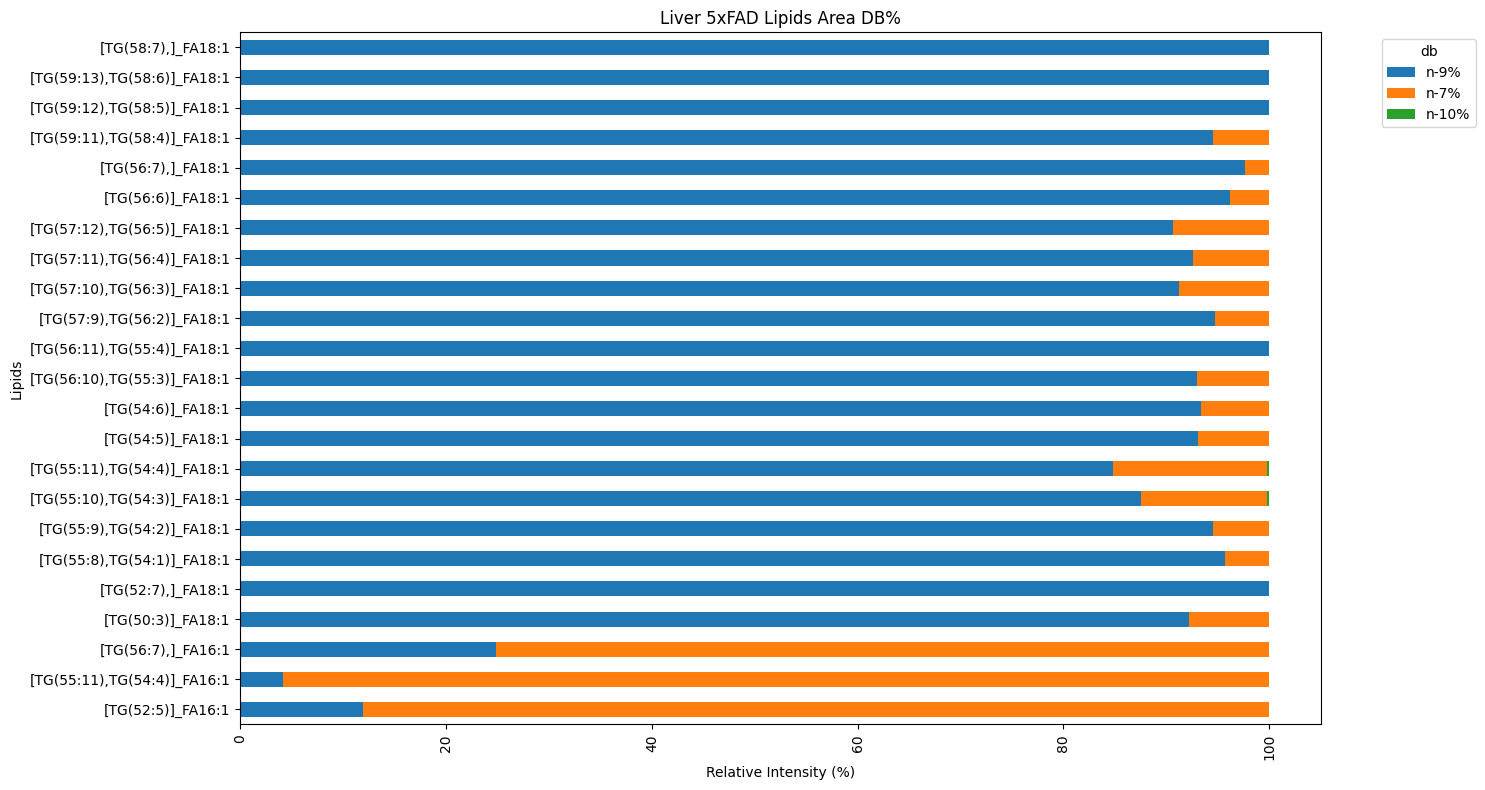

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_liver3 is your DataFrame
# df_liver3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Reshaping the DataFrame
reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

reshaped_df


# Creating a pivot table
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')

# ### SPECIAL CODE TO ADD KEY SORT FA16:1 FIRST and then DROP THE KEY
# # Create a sorting key
# pivot_df['Sort_Key'] = pivot_df.index.str.contains('FA16:1').astype(int)

# # Sort the DataFrame based on the sorting key
# pivot_df = pivot_df.sort_values(by='Sort_Key', ascending=False)

# # Drop the sorting key column
# pivot_df.drop('Sort_Key', axis=1, inplace=True)
# ###


# # Function to generate a sorting key from TG values while keeping the original Lipid name
# def tg_sort_key(lipid):
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
#     return tg_list_sorted + lipid  # Concatenating the sorted TG values with the original lipid name


# # Apply the function to the Lipid index to create a sorting key
# pivot_df['TG_Sort_Key'] = pivot_df.index.to_series().apply(tg_sort_key)

# # Sort the DataFrame by the TG sorting key
# pivot_df = pivot_df.sort_values(by='TG_Sort_Key')

# # Drop the TG sorting key column
# pivot_df.drop('TG_Sort_Key', axis=1, inplace=True)
###############
# Function to generate a combined sorting key
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

# Sort the DataFrame by the combined sorting key
pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# Reordering the columns to make n-9% appear first
# column_order = ['n-9%', 'n-7%', 'n-10%', 'n-12%']
column_order = ['n-9%', 'n-7%', 'n-10%']
pivot_df = pivot_df[column_order]
#delete FA18:2

pivot_df
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
pivot_df.plot(kind='barh', stacked=True, ax=ax)

ax.set_xlabel('Relative Intensity (%)')
ax.set_ylabel('Lipids')
ax.set_title('Liver 5xFAD Lipids Area DB%')
plt.xticks(rotation=90)

# Moving the legend outside of the plot
ax.legend(title='db', bbox_to_anchor=(1.05, 1), loc='upper left')

# Saving the plot as a PNG file
plt.savefig('Barstack_area/Liver_5xFAD_Area.png', dpi=300, bbox_inches='tight')
#save as pdf
plt.savefig('Barstack_area/Liver_5xFAD_Area.pdf', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
